# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 64.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 64.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 72.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 64.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 74.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 68.3 MB/s eta 0:00:01
     |██████████████████

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Defining transforms
transform = transforms.Compose(
    [
        transforms.ToTensor(),
         transforms.Normalize((0.5,), (0.5,))
    ])

# Download and load the original training data
full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Define the sizes for training and validation sets
train_size = int(0.8 * len(full_trainset))
val_size = len(full_trainset) - train_size

# Split the dataset
trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:

print(f"Training set size: {len(trainset)}")
print(f"Validation set size: {len(valset)}")
print(f"Test set size: {len(testset)}")

Training set size: 48000
Validation set size: 12000
Test set size: 10000


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Because MNIST images are grayscale and already centered, so no color-related transformations are needed, also there is no need to use transformation like Flip for example number five filpped is not actually a five and dataste already simple and clean so we only use `Normalize` and `ToTensor`  to Scales pixel values to the range [0, 1] and scales the input to the range [-1, 1].


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


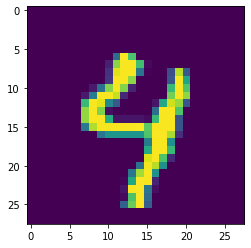

7


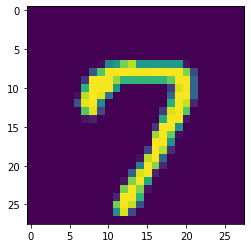

4


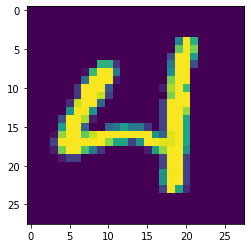

5


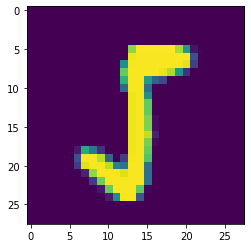

9


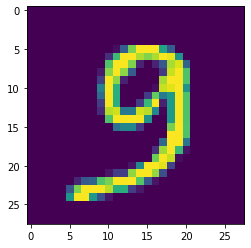

In [6]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #CNN Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        #Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
        #Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #Dropout 
        self.dropout = nn.Dropout(p=0.25)
        
    def Forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = torch.flatten(x, 1)#flatten the tensor 
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# instantiate the model and move it to device (Gpu if avialable)
net = Net()

#Define loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
# Lists to store loss and accuracy for plotting
train_losses = list()
val_losses = list()
train_accuracies = list()
val_accuracies = list()

#train and validation function
def train(num_epoch, trainloader, valloader):
    for epoch in range(num_epoch):
        net.train() #set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for i, data in enumerate(trainloader, 0):
            inputs, labels =  data
            inputs, labels =  inputs.to(device), labels.to(device)
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            #forward pass
            outputs = net.Forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            #calc train accuracy 
            # finds the class label with the highest score
            _, pred = torch.max(outputs, 1)
            #total number of training examples across all batches.
            total_train += labels.size(0)
            #calculates the number of correct predictions in the current batch
            correct_train += (pred == labels).sum().item()
            
              
        # Calculate training accuracy and loss
        train_loss = running_loss / len(trainloader)
        train_accuracy =  (correct_train / total_train) * 100

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
                
            
        #validation
        net.eval() #set the model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        #disable gradients for validation
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = net.Forward(inputs)
                loss = criterion(outputs, labels)
                
                _, preds = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (preds == labels).sum().item()
                val_loss += loss.item()
                
        # Calculate validation accuracy and loss
        val_loss = val_loss / len(valloader)
        val_accuracy =correct_val / total_val * 100

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}: Training Loss: {train_loss:.3f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.3f}, Validation Accuracy: {val_accuracy:.2f}%')
        print(20 * "-")
    print('Finished Training')
    

In [9]:
train(num_epoch=10,trainloader=trainloader,valloader=valloader)

Epoch 1: Training Loss: 0.544, Training Accuracy: 82.60%, Validation Loss: 0.207, Validation Accuracy: 93.92%
--------------------
Epoch 2: Training Loss: 0.283, Training Accuracy: 92.05%, Validation Loss: 0.156, Validation Accuracy: 95.50%
--------------------
Epoch 3: Training Loss: 0.244, Training Accuracy: 93.25%, Validation Loss: 0.225, Validation Accuracy: 93.33%
--------------------
Epoch 4: Training Loss: 0.226, Training Accuracy: 94.05%, Validation Loss: 0.141, Validation Accuracy: 95.97%
--------------------
Epoch 5: Training Loss: 0.230, Training Accuracy: 93.90%, Validation Loss: 0.204, Validation Accuracy: 94.68%
--------------------
Epoch 6: Training Loss: 0.225, Training Accuracy: 94.30%, Validation Loss: 0.144, Validation Accuracy: 95.81%
--------------------
Epoch 7: Training Loss: 0.212, Training Accuracy: 94.50%, Validation Loss: 0.220, Validation Accuracy: 93.94%
--------------------
Epoch 8: Training Loss: 0.237, Training Accuracy: 94.07%, Validation Loss: 0.191, V

Plot the training loss (and validation loss/accuracy, if recorded).

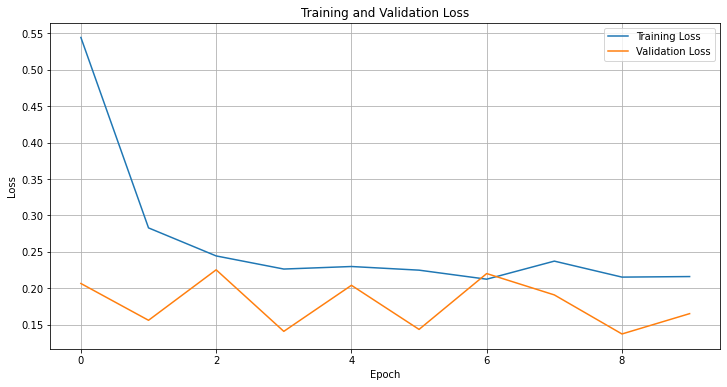

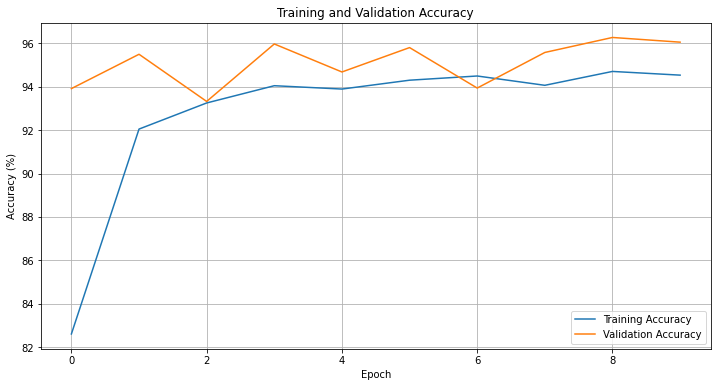

In [10]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()  # Adds a legend explaining the lines
plt.grid(True)  # Adds a grid to the plot
plt.show()  # Displays the plot

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()  # Adds a legend explaining the lines
plt.grid(True)  # Adds a grid to the plot
plt.show()  # Displays the plot


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
# Function to calculate accuracy
def test_accuracy(testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels= images.to(device), labels.to(device)
            outputs = net.Forward(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100 

# Calculate accuracy on the validation and test datasets
test_accuracy = test_accuracy(testloader)

print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 95.97%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
# decreased the learning rate from 0.01 to 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)
#increase number of epochs to 20
train(20, trainloader, valloader)

Epoch 1: Training Loss: 0.144, Training Accuracy: 96.26%, Validation Loss: 0.099, Validation Accuracy: 97.41%
--------------------
Epoch 2: Training Loss: 0.113, Training Accuracy: 96.94%, Validation Loss: 0.088, Validation Accuracy: 97.77%
--------------------
Epoch 3: Training Loss: 0.102, Training Accuracy: 97.19%, Validation Loss: 0.083, Validation Accuracy: 97.67%
--------------------
Epoch 4: Training Loss: 0.097, Training Accuracy: 97.36%, Validation Loss: 0.080, Validation Accuracy: 97.75%
--------------------
Epoch 5: Training Loss: 0.088, Training Accuracy: 97.53%, Validation Loss: 0.080, Validation Accuracy: 97.99%
--------------------
Epoch 6: Training Loss: 0.084, Training Accuracy: 97.63%, Validation Loss: 0.078, Validation Accuracy: 97.85%
--------------------
Epoch 7: Training Loss: 0.082, Training Accuracy: 97.63%, Validation Loss: 0.079, Validation Accuracy: 97.84%
--------------------
Epoch 8: Training Loss: 0.076, Training Accuracy: 97.76%, Validation Loss: 0.080, V

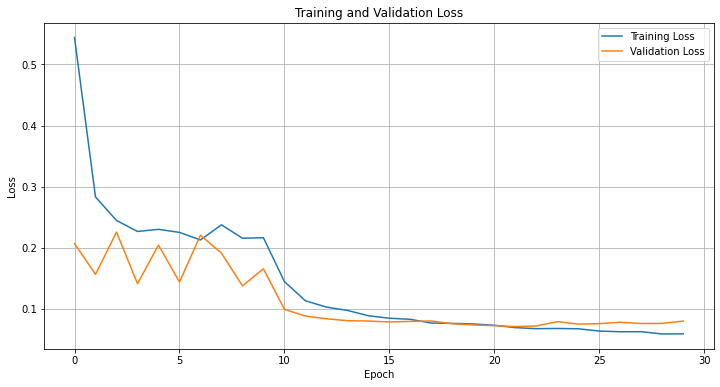

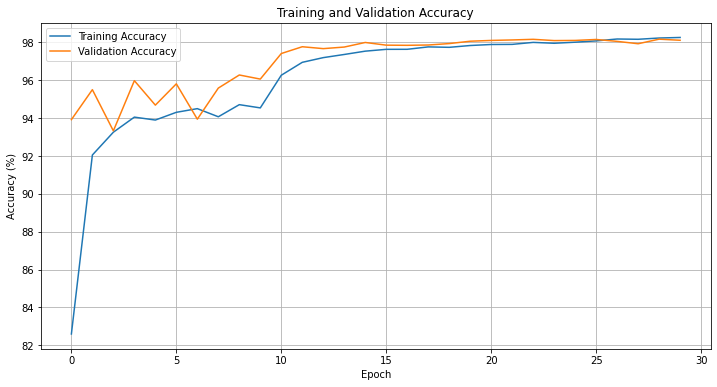

In [16]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()  # Adds a legend explaining the lines
plt.grid(True)  # Adds a grid to the plot
plt.show()  # Displays the plot

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()  # Adds a legend explaining the lines
plt.grid(True)  # Adds a grid to the plot
plt.show()  # Displays the plot


In [20]:
# Function to calculate accuracy
def test_accuracy(testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels= images.to(device), labels.to(device)
            outputs = net.Forward(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100 

# Calculate accuracy on the validation and test datasets
test_accuracy2 = test_accuracy(testloader)

print(f'Test Accuracy: {test_accuracy2:.2f}%')

Test Accuracy: 97.92%


## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
torch.save(net.state_dict(), "saved_model.pth")